In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import os
import random
from collections import Counter, defaultdict
from itertools import product, combinations
import math
import cv2
from sklearn.model_selection import train_test_split

random.seed(42)

%matplotlib inline

In [12]:
IMAGE_SIZE = (70, 70)

def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
 
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
 
	# return the edged image
	return edged

def process_image(image_location, params):
    """
        Given the image location, process the image
    """
    # print(image_location)
    
    image = cv2.imread(image_location)
    
    if image.shape[0] != IMAGE_SIZE[0] or image.shape[1] != IMAGE_SIZE[1]:
        # print("Resizing the image: {0}".format(image_location))
        resized_image = cv2.resize(image, IMAGE_SIZE, interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    if params.get("invert") == True:
            gray = cv2.bitwise_not(gray)

    # edges = auto_canny(gray)
    # print(edges.shape)
    
    
    # assert(denoised != edges)
    # weighted_sum = cv2.addWeighted(gray, 0.7, edges, 0.3, 0)
    gray = gray[..., np.newaxis]
       
    return gray

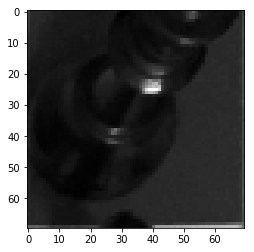

In [14]:
# gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\bk\\0645_7.jpg", {"invert": True})
gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\bk\\0645_7.jpg", {})
plt.imshow(np.squeeze(gray), cmap='gray')

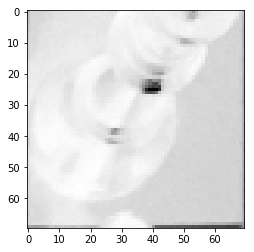

In [15]:
gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\bk\\0645_7.jpg", {"invert": True})
#gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\bk\\0645_7.jpg", {"invert": False})
plt.imshow(np.squeeze(gray), cmap='gray')

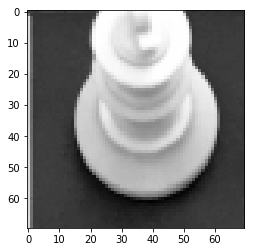

In [17]:
gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\wk\\0651_3.jpg", {})
plt.imshow(np.squeeze(gray), cmap='gray')

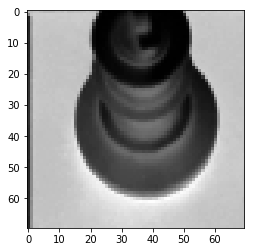

In [18]:
gray = process_image("G:\\ExtendingBoardGamesOnline\\train\\wk\\0651_3.jpg", {"invert": True})
plt.imshow(np.squeeze(gray), cmap='gray')

In [20]:
gray = gray/255.0

In [21]:
gray

array([[[0.59215686],
        [0.59607843],
        [0.61568627],
        ...,
        [0.65098039],
        [0.65882353],
        [0.63137255]],

       [[0.44313725],
        [0.61960784],
        [0.64313725],
        ...,
        [0.63529412],
        [0.63529412],
        [0.63529412]],

       [[0.11764706],
        [0.51372549],
        [0.64313725],
        ...,
        [0.61960784],
        [0.61960784],
        [0.62352941]],

       ...,

       [[0.12156863],
        [0.46666667],
        [0.61960784],
        ...,
        [0.61568627],
        [0.61176471],
        [0.60392157]],

       [[0.12156863],
        [0.47058824],
        [0.61176471],
        ...,
        [0.61176471],
        [0.60784314],
        [0.60784314]],

       [[0.13333333],
        [0.45882353],
        [0.61176471],
        ...,
        [0.61176471],
        [0.60784314],
        [0.61568627]]])